In [1]:
# Импортирование данных
import pandas as pd
import numpy as np
import seaborn as sns
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

In [2]:
# Извлечение данных в датафрейм
df_flags = pd.read_csv(url)

In [3]:
# Присваивание имен колонкам 
columns = ['name', 'landmass', 'zone', 
           'area', 'population', 'lang', 'religion',
          'bars', 'stripes', 'colours', 'red',
          'green', 'blue', 'gold', 'white',
          'black', 'orange', 'mainhue', 'cicrles',
          'crosses', 'saltires', 'quartets', 'sunstars', 'crescent',
          'triangle', 'icon', 'animate', 'text',
          'topleft', 'botright']
df_flags.columns = columns
df_flags.head()

,name,landmass,zone,area,population,lang,religion,bars,stripes,colours,...,saltires,quartets,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black


In [4]:
# Присваивание переменной targets целевых значений
targets = df_flags.landmass
# Извлечение из выборки целевых значений и колонки name, так как она не имеет значения в классификации
data = df_flags.drop(['landmass'], axis=1)
data = df_flags.drop(['name'], axis=1)

In [5]:
# Присваивание строковым значениям соответствующие числовые значения
topleft = {'red': 1,'green': 2,'blue': 3,'white': 4,'black': 5,
         'orange': 6, 'gold': 7} 
botright = {'red': 1,'white': 2,'black': 3,'blue': 4,'green': 5,
         'orange': 6, 'gold': 7, 'brown': 8} 
mainhue = {'red': 1,'green': 2,'blue': 3,'gold': 4,
           'white': 5,'orange': 5,
         'black': 6, 'brown': 7} 
data.topleft = [topleft[item] for item in data.topleft]
data.botright = [botright[item] for item in data.botright]
data.mainhue = [mainhue[item] for item in data.mainhue]
new_data = data
new_data.head()

,landmass,zone,area,population,lang,religion,bars,stripes,colours,red,...,saltires,quartets,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,3,1,29,3,6,6,0,0,3,1,...,0,0,1,0,0,0,1,0,1,1
1,4,1,2388,20,8,2,2,0,3,1,...,0,0,1,1,0,0,0,0,2,2
2,6,3,0,0,1,1,0,0,5,1,...,0,0,0,0,1,1,1,0,3,1
3,3,1,0,0,6,0,3,0,3,1,...,0,0,0,0,0,0,0,0,3,1
4,4,2,1247,7,10,5,0,2,3,1,...,0,0,1,0,0,1,0,0,1,3


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Приведение датафрейма к массиву numpy (необходимо для последующего использования UMAP)
X = data.to_numpy()
y = targets.to_numpy()
# Нормализация данных (приведение всех значений к значениям в диапазоне от 0 до 1)
X = StandardScaler().fit_transform(X)
# Разделение на тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.2,random_state=20)

In [7]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

In [9]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,2,3,4,5,6]))
confusion = pd.DataFrame(cm, index = ['N.America', 'S.America', 
                                      'Europe', 'Africa', 'Asia',
                                     'Oceania'], 
                         columns = ['predicted N.America', 
                                    'predicted S.America', 
                                      'predicted Europe', 
                                    'predicted Africa',
                                    'predicted Asia',
                                     'predicted Oceania'])
confusion

,predicted N.America,predicted S.America,predicted Europe,predicted Africa,predicted Asia,predicted Oceania
N.America,4,0,0,0,0,0
S.America,2,0,0,0,1,0
Europe,1,0,7,2,0,0
Africa,0,0,1,7,4,0
Asia,0,0,0,3,4,0
Oceania,0,0,0,1,0,2


In [10]:
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.57      1.00      0.73         4
           2       0.00      0.00      0.00         3
           3       0.88      0.70      0.78        10
           4       0.54      0.58      0.56        12
           5       0.44      0.57      0.50         7
           6       1.00      0.67      0.80         3

    accuracy                           0.62        39
   macro avg       0.57      0.59      0.56        39
weighted avg       0.61      0.62      0.60        39



In [11]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.6153846153846154


In [12]:
C = 1.0
svc = SVC(kernel='linear', C=C)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8974358974358975


In [13]:
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C)
rbf_svc.fit(X_train, y_train)
y_pred = rbf_svc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3333333333333333


In [14]:
poly_svc = SVC(kernel='poly', degree=3, C=C,  gamma=0.7)
poly_svc.fit(X_train, y_train)
y_pred = poly_svc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5897435897435898


In [15]:
from umap import UMAP
from sklearn.preprocessing import StandardScaler
import pylab as pl

umap_train = UMAP(n_components=2, n_neighbors=5).fit_transform(X_train)
# X_train = umap_train.transform(X_train)
umap_test = UMAP(n_components=2, n_neighbors=5).fit_transform(X_test)
# X_test = umap_train.transform(X_test)

rbf_model = SVC(kernel='rbf', gamma=0.7, C=C)
rbf_model.fit(umap_train, y_train)

poly_model = SVC(kernel='poly', degree=3, C=C,  gamma=0.7)
poly_model.fit(umap_train, y_train)

linear_model = SVC(kernel='linear', C=C)
linear_model.fit(umap_train, y_train)

x_min, x_max = umap_train[:, 0].min() - 1,   umap_train[:,0].max() + 1
y_min, y_max = umap_train[:, 1].min() - 1,   umap_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))

In [16]:
# После использования UMAP на всех моделях наблюдается сильное снижение точности
y_pred = rbf_model.predict(umap_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3076923076923077


In [17]:
y_pred = poly_model.predict(umap_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.10256410256410256


In [18]:
y_pred = linear_model.predict(umap_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3076923076923077


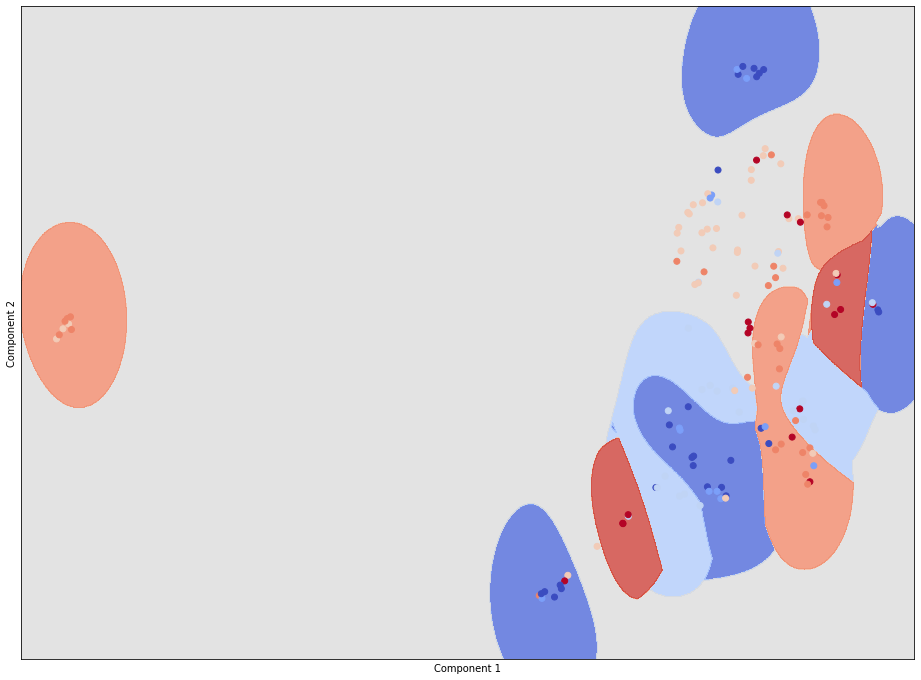

In [19]:
for i, clf in enumerate((rbf_model,)):
#     pl.subplot(2, 2, i + 1)
    pl.figure(1, figsize=(16, 12))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pl.contourf(xx, yy, Z, cmap=pl.cm.coolwarm, alpha=0.8)

# Plot also the training points
    pl.scatter(umap_train[:, 0], umap_train[:, 1], c=y_train, cmap=pl.cm.coolwarm)
    pl.xlabel('Component 1')
    pl.ylabel('Component 2')
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    pl.xticks(())
    pl.yticks(())
    pl.show()

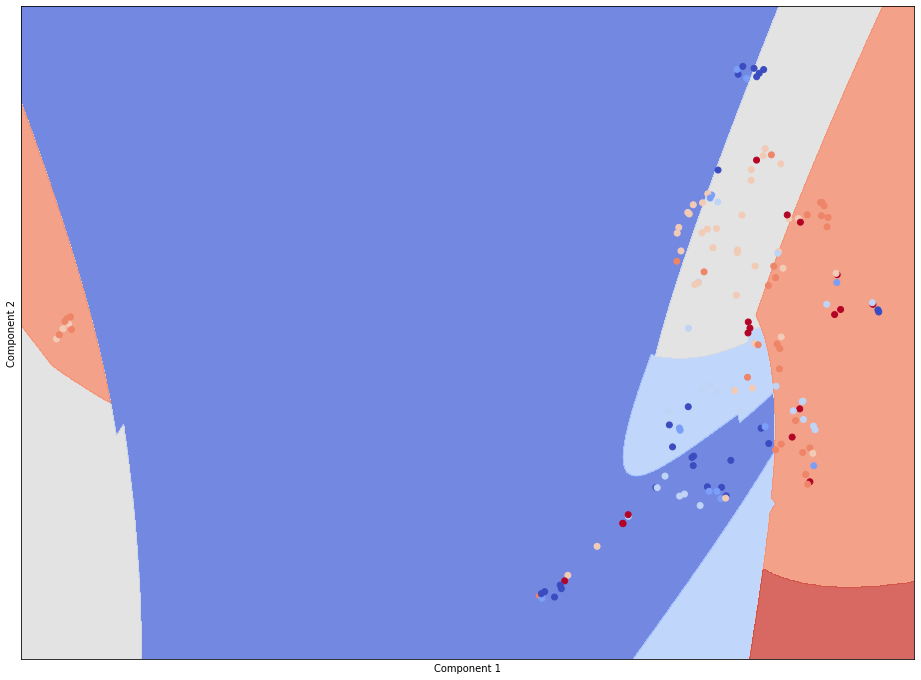

In [20]:
for i, clf in enumerate((poly_model,)):
#     pl.subplot(2, 2, i + 1)
    pl.figure(1, figsize=(16, 12))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pl.contourf(xx, yy, Z, cmap=pl.cm.coolwarm, alpha=0.8)

# Plot also the training points
    pl.scatter(umap_train[:, 0], umap_train[:, 1], c=y_train, cmap=pl.cm.coolwarm)
    pl.xlabel('Component 1')
    pl.ylabel('Component 2')
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    pl.xticks(())
    pl.yticks(())
    pl.show()

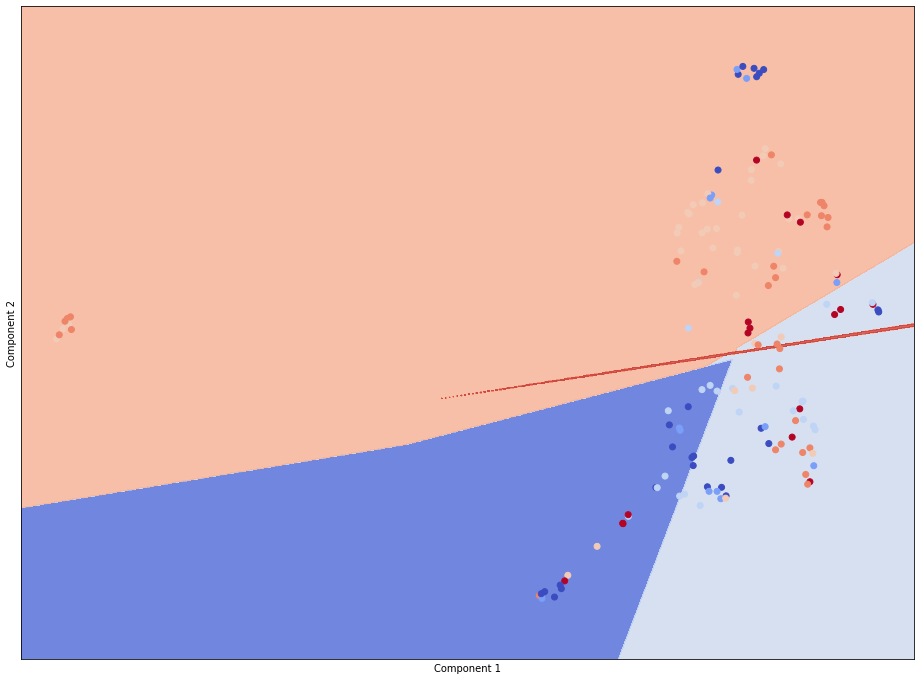

In [21]:
for i, clf in enumerate((linear_model,)):
#     pl.subplot(2, 2, i + 1)
    pl.figure(1, figsize=(16, 12))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pl.contourf(xx, yy, Z, cmap=pl.cm.coolwarm, alpha=0.8)

# Plot also the training points
    pl.scatter(umap_train[:, 0], umap_train[:, 1], c=y_train, cmap=pl.cm.coolwarm)
    pl.xlabel('Component 1')
    pl.ylabel('Component 2')
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    pl.xticks(())
    pl.yticks(())
    pl.show()